
Loading dataset\
Preprocessing the dataset\
Definition of Neural Network\
Training a Neural Network\
Testing a Neural Network



### import labraries and load dataset

In [33]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt

 #### Splitting and loading dataset

In [34]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.cifar10.load_data()

### DIsplay dataset

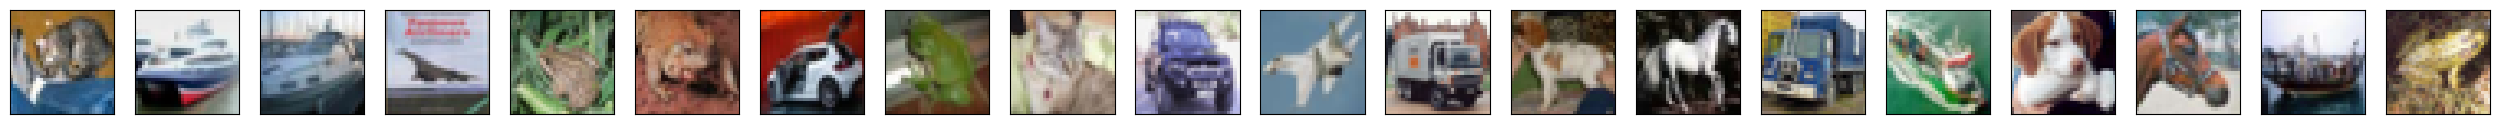

In [35]:
n = 20
plt.figure(figsize=(32,32))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(32,32,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

### Normalization

In [36]:
X_train,X_test = X_train/255.0,X_test/255.0

In [37]:
# class Names
class_name = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

### Model defination
* using flatten,3 Dense layers of 512,256, 10 neurons

In [38]:
model = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(900,activation='relu'),
    layers.Dense(526,activation='relu'),
    layers.Dense(10,activation='softmax')
                 
])

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [39]:
# Compile the ANN Model

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )

### Model Training

In [ ]:
histroy = model.fit(X_train,y_train,epochs=29,validation_data=(X_test,y_test))

Epoch 1/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 111s 68ms/step - accuracy: 0.2795 - loss: 2.0455 - val_accuracy: 0.3880 - val_loss: 1.7187
Epoch 2/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 64ms/step - accuracy: 0.3897 - loss: 1.6895 - val_accuracy: 0.4229 - val_loss: 1.6144
Epoch 3/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 107s 68ms/step - accuracy: 0.4284 - loss: 1.5927 - val_accuracy: 0.4290 - val_loss: 1.5810
Epoch 4/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.4528 - loss: 1.5379 - val_accuracy: 0.4462 - val_loss: 1.5482
Epoch 5/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 101s 65ms/step - accuracy: 0.4627 - loss: 1.5058 - val_accuracy: 0.4275 - val_loss: 1.6162
Epoch 6/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 97s 62ms/step - accuracy: 0.4702 - loss: 1.4787 - val_accuracy: 0.4691 - val_loss: 1.4909
Epoch 7/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.4827 - loss: 1.4478 - val_accuracy: 0.4596 - val_loss: 1.5159
Epoch 8/29
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 96s 61ms/step - accuracy: 0.4

### Model avaluation

In [20]:
test_acc,test_loss = model.evaluate(X_test,y_test,verbose=2)
print(f'\nTest Accuracy:{test_acc}')

313/313 - 1s - 4ms/step - accuracy: 0.4895 - loss: 1.4656

Test Accuracy:1.465576410293579


### Data visulization

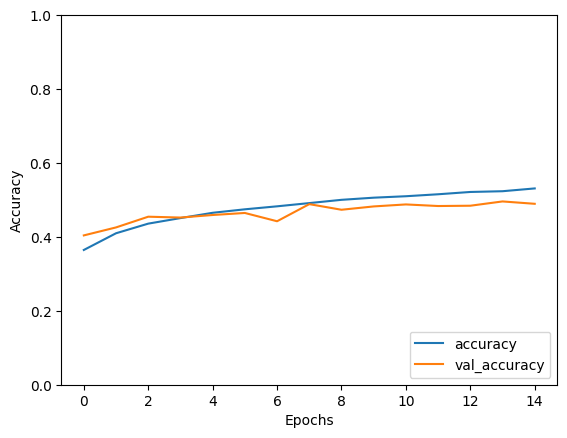

In [23]:
plt.plot(histroy.history['accuracy'],label='accuracy')
plt.plot(histroy.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()

In [31]:
# prediction of image
predictions = model.predict(X_test[:30])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


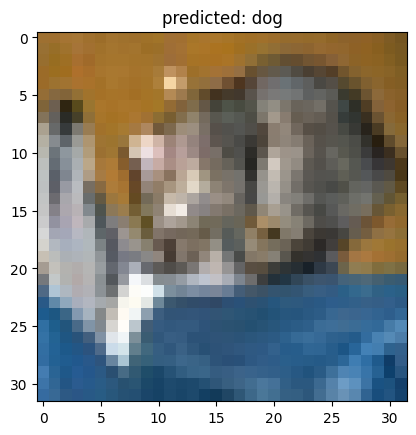

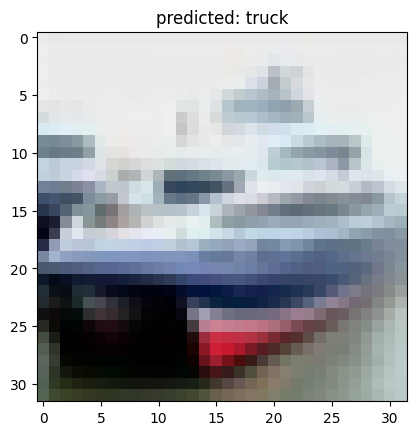

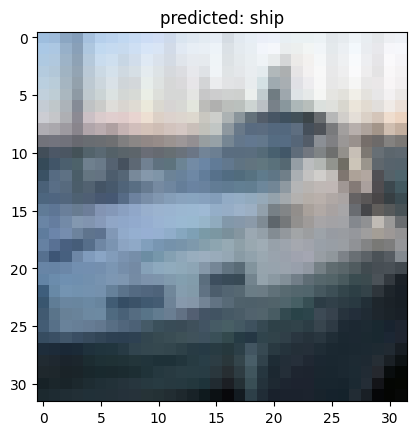

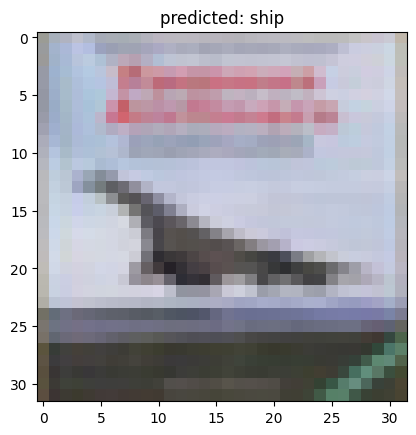

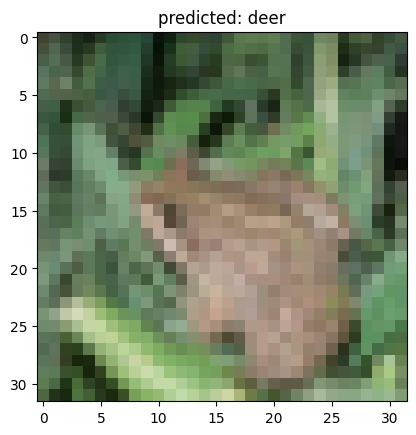

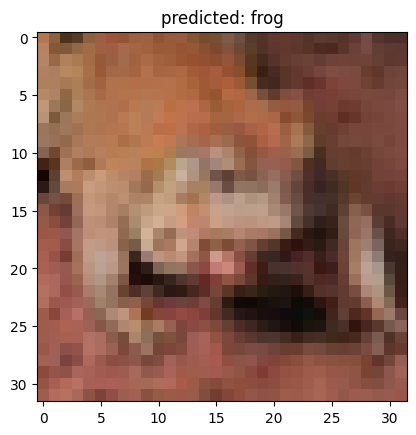

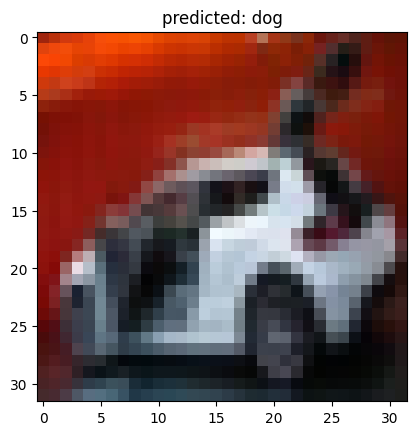

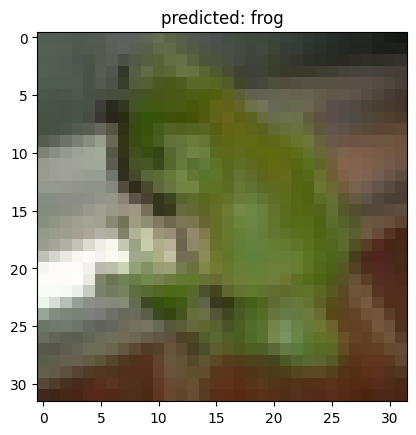

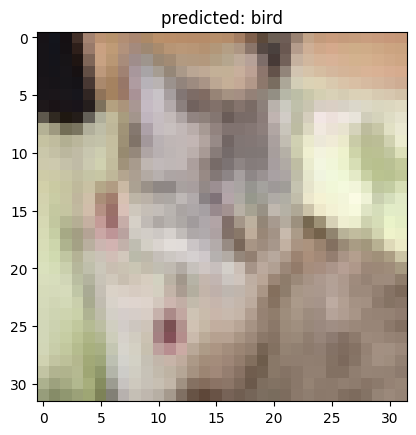

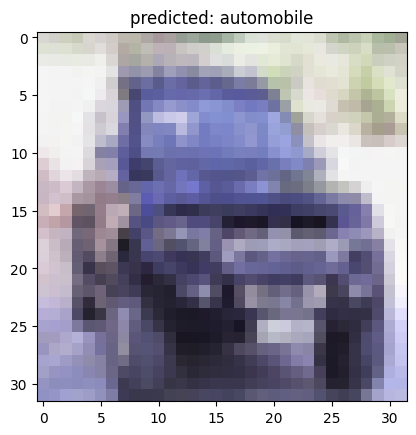

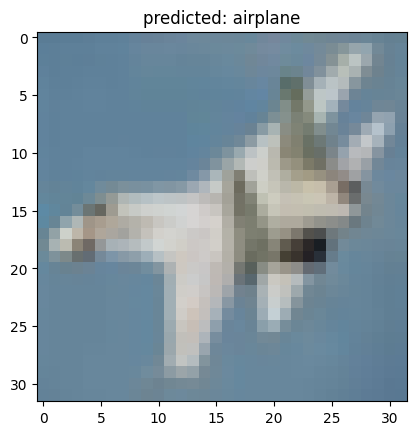

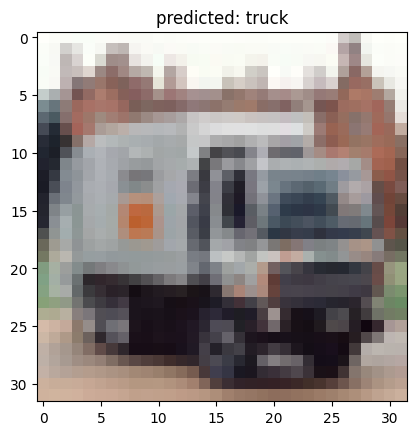

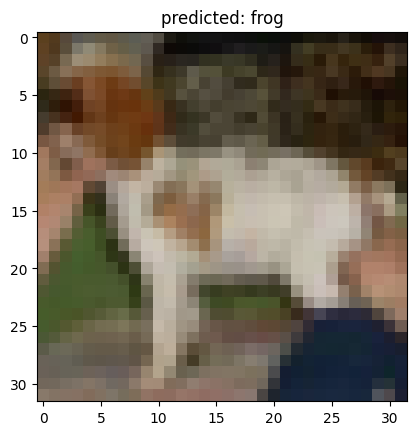

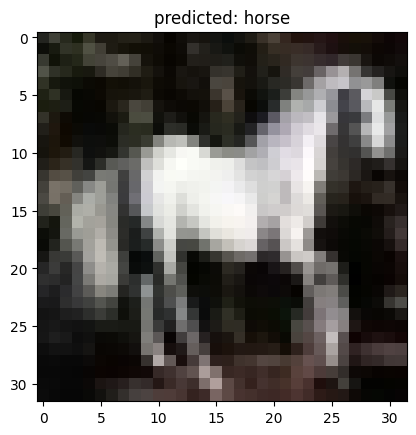

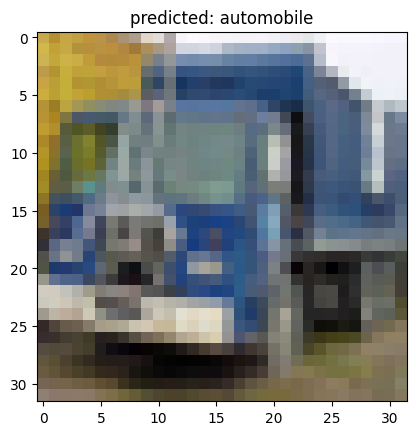

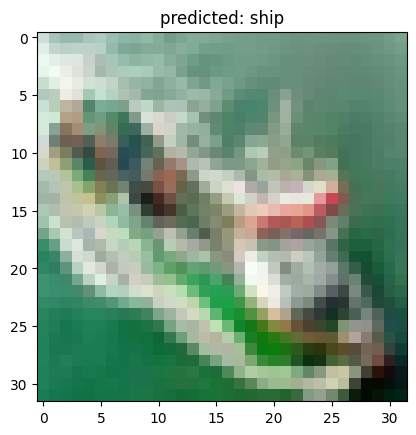

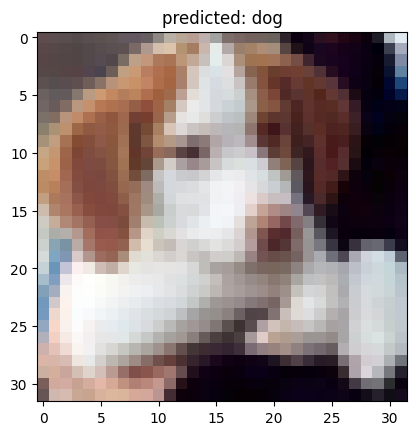

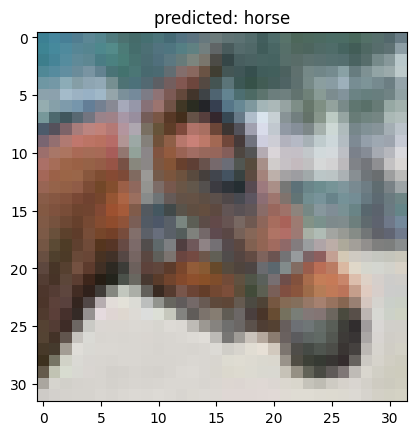

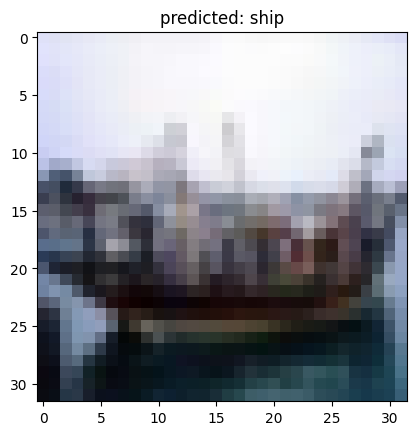

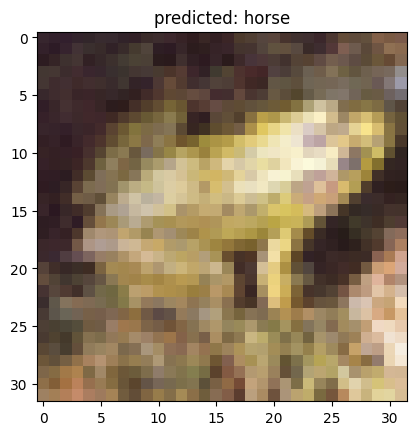

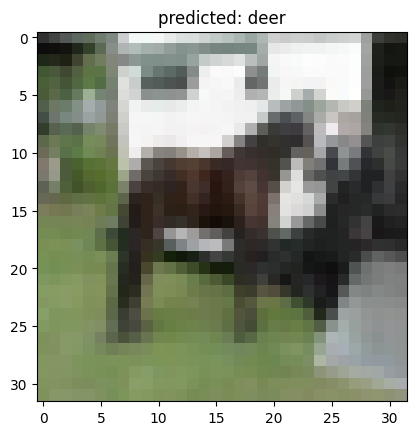

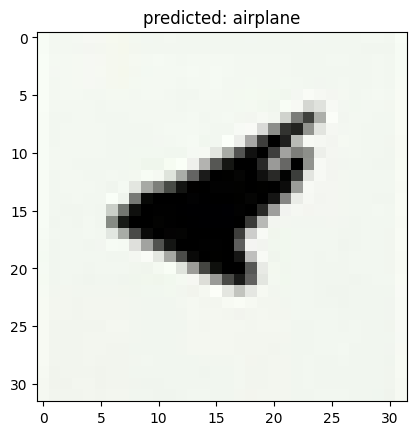

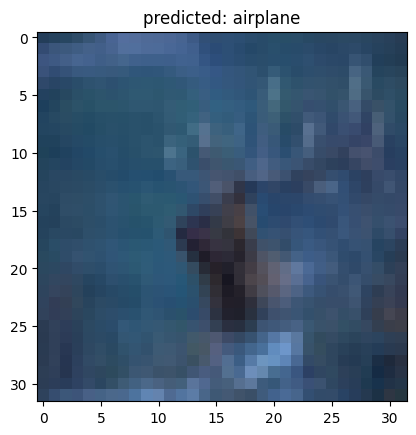

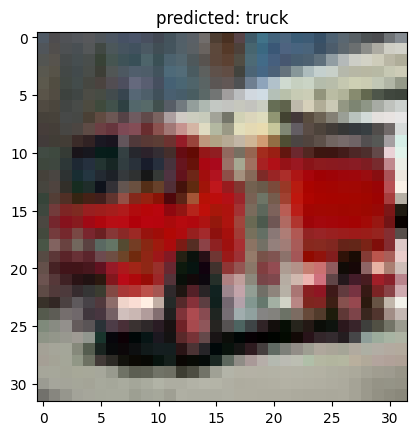

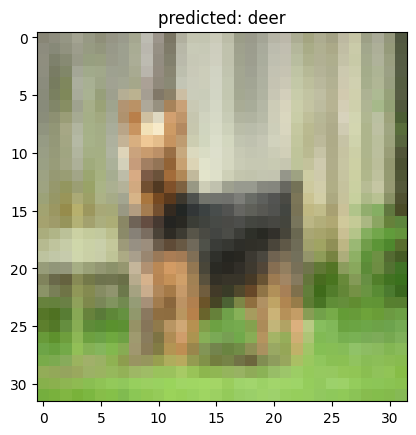

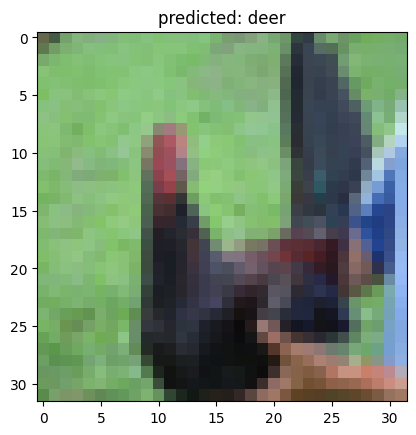

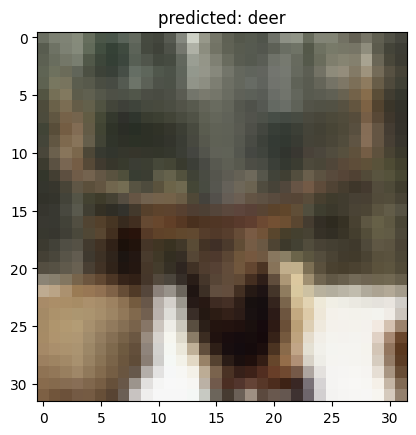

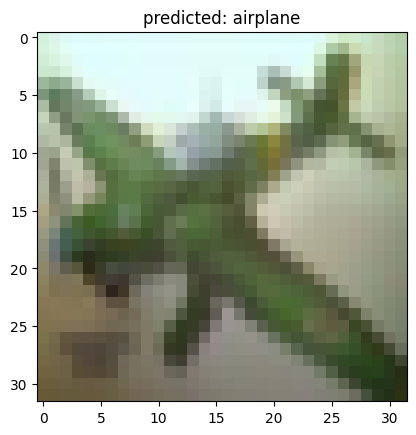

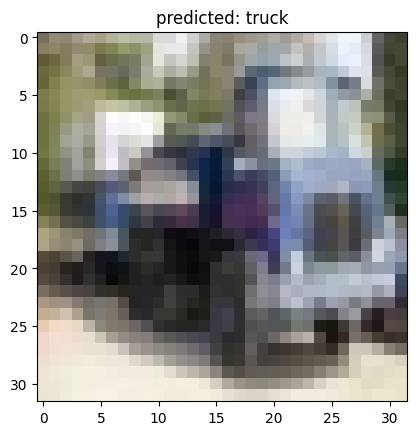

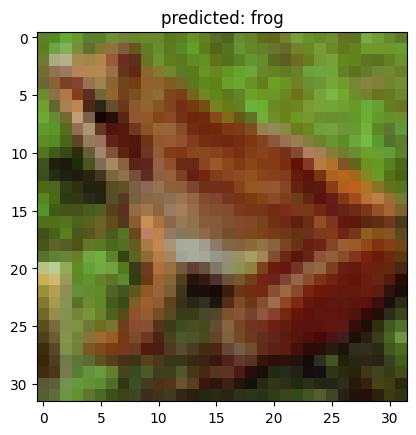

In [32]:
# display pred

for i in range(30):
    plt.figure()
    plt.imshow(X_test[i])
    plt.title(f"predicted: {class_name[predictions[i].argmax()]}")
    plt.show()